Contexto e Conteúdo
--
Uma empresa que atua em Big Data e Data Science deseja contratar cientistas de dados entre as pessoas que obtiverem aprovação em alguns cursos ministrados pela empresa. Muitas pessoas se inscrevem para o treinamento. A empresa quer saber quais desses candidatos realmente querem trabalhar para a empresa após o treinamento ou à procura de um novo emprego, pois ajuda a reduzir o custo e o tempo, bem como a qualidade do treinamento ou planejamento dos cursos e categorização dos candidatos . Informações relacionadas à demografia, educação, experiência estão em mãos desde a inscrição e inscrição dos candidatos.

Este conjunto de dados foi desenvolvido para entender os fatores que levam uma pessoa a deixar o emprego atual para fazer pesquisas de RH também. Por modelo (s) que usam as credenciais atuais, dados demográficos, dados de experiência, você vai prever a probabilidade de um candidato procurar um novo emprego ou trabalhar para a empresa, bem como interpretar os fatores afetados na decisão do funcionário.

Todos os dados divididos para treinar e testar. O destino não está incluído no teste, mas o arquivo de dados dos valores de destino do teste está em mãos para tarefas relacionadas. Um exemplo de envio corresponde a enrollee_id do conjunto de teste fornecido também com as colunas: enrollee _id, target




Inspiração
 --
Preveja a probabilidade de um candidato trabalhar para a empresa
Interprete o (s) modelo (s) de forma a ilustrar quais recursos afetam a decisão do candidato.


Avaliação
--
A métrica de avaliação é a área sob a pontuação da curva ROC .




Endereço da Base de Dados
--
https://www.kaggle.com/arashnic/hr-analytics-job-change-of-data-scientists

Importando Bibliotecas
---


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 

#pip install scikit-plot
#!pip install scikit-plot
import calendar
from itertools import cycle

from sklearn import metrics

from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from scipy import interp
from sklearn.metrics import roc_auc_score

from sklearn.linear_model import LogisticRegression

import statsmodels.api as sm
import statsmodels.formula.api as smf

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Importando e exibindo os dados - Arquivo contem 19 linhas
---


In [ ]:
pf = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/diaAdia/AnaliseRH/aug_train.csv')
#display(pf)  
pf.head()


,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,36,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5,NaN,NaN,never,83,0.0
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,<1,NaN,Pvt Ltd,never,52,1.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0.0


Para um melhor entendimento do significado das colunas, acabei por traduzi-las
---

enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target

id de inscrito, cidade, índice de desenvolvimento da cidade, Gênero sexual, experiência relevante, universidade matriculada, nível de educação, disciplina principal, experiência, tamanho da empresa, modelo, último novo trabalho, horas de treinamento, alvo


In [ ]:
pf = pf.rename(columns = {"enrollee_id": "ID","city":"Cidade","city_development_index":"Indice_Desenvolvimento_Cidade","gender":"Genero","relevent_experience":"Experiencia_Relevante","enrolled_university":"Universidade_Matriculada","education_level":"Nível_de_Educação","major_discipline":"Disciplina_Principal","experience":"Experiência","company_size":"Tamanho_da_Empresa","company_type":"Tipo_da_Companhia","last_new_job":"Ultimo_Novo_Trabalho","training_hours":"Horas_de_Treinamento","target":"Alvo" })
pf.head()

,ID,Cidade,Indice_Desenvolvimento_Cidade,Genero,Experiencia_Relevante,Universidade_Matriculada,Nível_de_Educação,Disciplina_Principal,Experiência,Tamanho_da_Empresa,Tipo_da_Companhia,Ultimo_Novo_Trabalho,Horas_de_Treinamento,Alvo
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,36,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5,NaN,NaN,never,83,0.0
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,<1,NaN,Pvt Ltd,never,52,1.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0.0


#E VAMOS PARA O TRATAMENTO DOS DADOS
___

In [ ]:
# INFORMAÇÕES DO DATAFRAME

#pf.info()

#      Column                         Non-Null Count  Dtype  
# ---  ------                         --------------  -----  
#  0   ID                             19158 non-null  int64  
#  1   Cidade                         19158 non-null  object 
#  2   Indice_Desenvolvimento_Cidade  19158 non-null  float64
#  3   Genero                         14650 non-null  object 
#  4   Experiencia_Relevante          19158 non-null  object 
#  5   Universidade_Matriculada       18772 non-null  object 
#  6   Nível_de_Educação              18698 non-null  object 
#  7   Disciplina_Principal           16345 non-null  object 
#  8   Experiência                    19093 non-null  object 
#  9   Tamanho_da_Empresa             13220 non-null  object 
#  10  Tipo_da_Companhia              13018 non-null  object 
#  11  Ultimo_Novo_Trabalho           18735 non-null  object 
#  12  Horas_de_Treinamento           19158 non-null  int64  
#  13  Alvo                           19158 non-null  float64
# dtypes: float64(2), int64(2), object(10)
# memory usage: 2.0+ MB



In [ ]:
# Quantidade de linhas e colunas

#pf.shape
#Resultado 19158 linhas e 14 colunas

In [ ]:
# Quantidade de Linhas e Colunas
#pf.isnull().sum()

# ID                                  0
# Cidade                              0
# Indice_Desenvolvimento_Cidade       0
# Genero                           4508
# Experiencia_Relevante               0
# Universidade_Matriculada          386
# Nível_de_Educação                 460
# Disciplina_Principal             2813
# Experiência                        65
# Tamanho_da_Empresa               5938
# Tipo_da_Companhia                6140
# Ultimo_Novo_Trabalho              423
# Horas_de_Treinamento                0
# Alvo                                0
# dtype: int64

In [ ]:
# Apagar as Linhas com Menores Quantidades de Nulo/Branco

#pf = pf.dropna(subset=["Nível_de_Educação", "Ultimo_Novo_Trabalho", "Universidade_Matriculada","Experiência"])

In [ ]:
#Média de valores nulos
pf.isna().mean()

# ID                               0.000000
# Cidade                           0.000000
# Indice_Desenvolvimento_Cidade    0.000000
# Genero                           0.235306
# Experiencia_Relevante            0.000000
# Universidade_Matriculada         0.020148
# Nível_de_Educação                0.024011
# Disciplina_Principal             0.146832
# Experiência                      0.003393
# Tamanho_da_Empresa               0.309949
# Tipo_da_Companhia                0.320493
# Ultimo_Novo_Trabalho             0.022080
# Horas_de_Treinamento             0.000000
# Alvo                             0.000000
# dtype: float64

ID                               0.000000
Cidade                           0.000000
Indice_Desenvolvimento_Cidade    0.000000
Genero                           0.235306
Experiencia_Relevante            0.000000
Universidade_Matriculada         0.020148
Nível_de_Educação                0.024011
Disciplina_Principal             0.146832
Experiência                      0.003393
Tamanho_da_Empresa               0.309949
Tipo_da_Companhia                0.320493
Ultimo_Novo_Trabalho             0.022080
Horas_de_Treinamento             0.000000
Alvo                             0.000000
dtype: float64

# COLUNA CIDADE

In [ ]:
ci = pf

In [ ]:
ci['Cidade']

0        city_103
1         city_40
2         city_21
3        city_115
4        city_162
           ...   
19153    city_173
19154    city_103
19155    city_103
19156     city_65
19157     city_67
Name: Cidade, Length: 19158, dtype: object

In [ ]:
# Exibindo os Valores por Grupos Distintos

ci.groupby(by='Cidade').size()

Cidade
city_1       26
city_10      86
city_100    275
city_101     75
city_102    304
           ... 
city_93      26
city_94      26
city_97     104
city_98      79
city_99      94
Length: 123, dtype: int64

In [ ]:
# Alterando o Valor city_ para o Valor vazio
 
ci.replace({'city_': ''}, regex=True, inplace=True) 

In [ ]:
  # Alterando a Coluna para Numérico
  
  ci['Cidade'] = pd.to_numeric(ci['Cidade'])

In [ ]:
# Criando uma Nova Coluna 

ci['CidadeGrupoUm'] = ""
ci['CidadeGrupoDois'] = ""

In [ ]:
# ALterando para Numerico 

ci['CidadeGrupoUm'] = pd.to_numeric(ci['CidadeGrupoUm'])
ci['CidadeGrupoDois'] = pd.to_numeric(ci['CidadeGrupoDois'])

In [ ]:
  # Preenchendo as  Novas Colunas conforme cada Condição

  for i, row in ci.iterrows():
      if row['Cidade'] > 1 & row['Cidade'] <=100 :
        ci.at[i, 'CidadeGrupoUm'] = 1
      else:
        ci.at[i, 'CidadeGrupoUm'] = 0

In [ ]:
for i, row in ci.iterrows():
    if row['Cidade'] > 100 & row['Cidade'] <= 200:
      ci.at[i, 'CidadeGrupoDois'] = 1
    else:
      ci.at[i, 'CidadeGrupoDois'] = 0

In [ ]:
# Alterano o Tipo da Coluna para INT

ci['CidadeGrupoUm'] = ci['CidadeGrupoUm'].astype(int)
ci['CidadeGrupoDois'] = ci['CidadeGrupoDois'].astype(int)

In [ ]:
# Excluindo a Colua Cidade após as alterações

ci = ci.drop(columns=['Cidade'])

In [ ]:
ci

,ID,Indice_Desenvolvimento_Cidade,Genero,Experiencia_Relevante,Universidade_Matriculada,Nível_de_Educação,Disciplina_Principal,Experiência,Tamanho_da_Empresa,Tipo_da_Companhia,Ultimo_Novo_Trabalho,Horas_de_Treinamento,Alvo,CidadeGrupoUm,CidadeGrupoDois
0,8949,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,36,1.0,1,1
1,29725,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0,1,1
2,11561,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5,NaN,NaN,never,83,0.0,1,1
3,33241,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,<1,NaN,Pvt Ltd,never,52,1.0,1,1
4,666,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0.0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19153,7386,0.878,Male,No relevent experience,no_enrollment,Graduate,Humanities,14,NaN,NaN,1,42,1.0,1,1
19154,31398,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,14,NaN,NaN,4,52,1.0,1,1
19155,24576,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,50-99,Pvt Ltd,4,44,0.0,1,1
19156,5756,0.802,Male,Has relevent experience,no_enrollment,High School,NaN,<1,500-999,Pvt Ltd,2,97,0.0,1,1


In [ ]:
# Confirma a criação das 2 Novas C0lunas CidadeGrupoUm e CidadeGrupoDois

#ci.info()

# ---  ------                         --------------  -----  
#  0   ID                             19158 non-null  int64  
#  1   Indice_Desenvolvimento_Cidade  19158 non-null  float64
#  2   Genero                         14650 non-null  object 
#  3   Experiencia_Relevante          19158 non-null  object 
#  4   Universidade_Matriculada       18772 non-null  object 
#  5   Nível_de_Educação              18698 non-null  object 
#  6   Disciplina_Principal           16345 non-null  object 
#  7   Experiência                    19093 non-null  object 
#  8   Tamanho_da_Empresa             13220 non-null  object 
#  9   Tipo_da_Companhia              13018 non-null  object 
#  10  Ultimo_Novo_Trabalho           18735 non-null  object 
#  11  Horas_de_Treinamento           19158 non-null  int64  
#  12  Alvo                           19158 non-null  float64
#  13  CidadeGrupoUm                  19158 non-null  int64  
#  14  CidadeGrupoDois                19158 non-null  int64  

In [ ]:
ci.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19158 entries, 0 to 19157
Data columns (total 15 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   ID                             19158 non-null  int64  
 1   Indice_Desenvolvimento_Cidade  19158 non-null  float64
 2   Genero                         14650 non-null  object 
 3   Experiencia_Relevante          19158 non-null  object 
 4   Universidade_Matriculada       18772 non-null  object 
 5   Nível_de_Educação              18698 non-null  object 
 6   Disciplina_Principal           16345 non-null  object 
 7   Experiência                    19093 non-null  object 
 8   Tamanho_da_Empresa             13220 non-null  object 
 9   Tipo_da_Companhia              13018 non-null  object 
 10  Ultimo_Novo_Trabalho           18735 non-null  object 
 11  Horas_de_Treinamento           19158 non-null  int64  
 12  Alvo                           19158 non-null 

In [ ]:
pf  = ci

# COLUNA INDICE DE  DESENVOLVIMENTO DA CIDADE

In [ ]:
idc = pf

In [ ]:
# Exibe a quantidade de linhas nulas

idc['Indice_Desenvolvimento_Cidade'].isnull().sum()

0

In [ ]:
# Exibe a coluna agrupados por mesmos valores

idc.groupby(by='Indice_Desenvolvimento_Cidade').size()

Indice_Desenvolvimento_Cidade
0.448      17
0.479      28
0.487       5
0.493      13
0.512       5
         ... 
0.924     301
0.925     171
0.926    1336
0.939     497
0.949      79
Length: 93, dtype: int64

In [ ]:
# Transforma esta coluna para tipo INT 

idc['Indice_Desenvolvimento_Cidade'] = idc['Indice_Desenvolvimento_Cidade'].astype(int)

In [ ]:
# Altera o valor de 0. para valor vazio 
 
idc.replace({'0.': ''}, regex=True, inplace=True) 

In [ ]:
# Cria uma Nova Coluna 

idc['Indice_400a500'] = ""
idc['Indice_501a600'] = ""
idc['Indice_601a700'] = ""
idc['Indice_701a800'] = ""
idc['Indice_801a949'] = ""

In [ ]:
# Alterando para o Tipo Numerico 

idc['Indice_400a500'] = pd.to_numeric(idc['Indice_400a500'])
idc['Indice_501a600'] = pd.to_numeric(idc['Indice_501a600'])
idc['Indice_601a700'] = pd.to_numeric(idc['Indice_601a700'])
idc['Indice_701a800'] = pd.to_numeric(idc['Indice_701a800'])
idc['Indice_801a949'] = pd.to_numeric(idc['Indice_801a949'])

In [ ]:
# Preechendo as Novas Colunas conforme casa CONDIÇÃO

for i, row in idc.iterrows():
    if row['Indice_Desenvolvimento_Cidade'] > 400 & row['Indice_Desenvolvimento_Cidade'] <= 500:
      idc.at[i, 'Indice_400a500'] = 1
    else:
      idc.at[i, 'Indice_400a500'] = 0

In [ ]:
for i, row in idc.iterrows():
    if row['Indice_Desenvolvimento_Cidade'] > 500 & row['Indice_Desenvolvimento_Cidade'] <= 600:
      idc.at[i, 'Indice_501a600'] = 1
    else:
      idc.at[i, 'Indice_501a600'] = 0

In [ ]:
for i, row in idc.iterrows():
    if row['Indice_Desenvolvimento_Cidade'] > 600 & row['Indice_Desenvolvimento_Cidade'] <= 700:
      idc.at[i, 'Indice_601a700'] = 1
    else:
      idc.at[i, 'Indice_601a700'] = 0

In [ ]:
for i, row in idc.iterrows():
    if row['Indice_Desenvolvimento_Cidade'] > 700 & row['Indice_Desenvolvimento_Cidade'] <= 800:
      idc.at[i, 'Indice_701a800'] = 1
    else:
      idc.at[i, 'Indice_701a800'] = 0

In [ ]:
for i, row in idc.iterrows():
    if row['Indice_Desenvolvimento_Cidade'] > 800 & row['Indice_Desenvolvimento_Cidade'] <= 949:
      idc.at[i, 'Indice_801a949'] = 1
    else:
      idc.at[i, 'Indice_801a949'] = 0

In [ ]:
# Alterando as colunas para o tipo INT

idc['Indice_400a500'] = idc['Indice_400a500'].astype(int)
idc['Indice_501a600'] = idc['Indice_501a600'].astype(int)
idc['Indice_601a700'] = idc['Indice_601a700'].astype(int)
idc['Indice_701a800'] = idc['Indice_701a800'].astype(int)
idc['Indice_801a949'] = idc['Indice_801a949'].astype(int)

In [ ]:
# Removendo a coluna Indice_Desenvolvimento_Cidade' após a tratamento de seus dados

idc = idc.drop(columns=['Indice_Desenvolvimento_Cidade'])

In [ ]:
# Exibe após as alteração

idc

,ID,Genero,Experiencia_Relevante,Universidade_Matriculada,Nível_de_Educação,Disciplina_Principal,Experiência,Tamanho_da_Empresa,Tipo_da_Companhia,Ultimo_Novo_Trabalho,Horas_de_Treinamento,Alvo,CidadeGrupoUm,CidadeGrupoDois,Indice_400a500,Indice_501a600,Indice_601a700,Indice_701a800,Indice_801a949
0,8949,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,36,1.0,1,1,0,0,0,0,0
1,29725,Male,No relevent experience,no_enrollment,Graduate,STEM,15,599,Pvt Ltd,>4,47,0.0,1,1,0,0,0,0,0
2,11561,NaN,No relevent experience,Full time course,Graduate,STEM,5,NaN,NaN,never,83,0.0,1,1,0,0,0,0,0
3,33241,NaN,No relevent experience,NaN,Graduate,Business Degree,<1,NaN,Pvt Ltd,never,52,1.0,1,1,0,0,0,0,0
4,666,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,599,Funded Startup,4,8,0.0,1,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19153,7386,Male,No relevent experience,no_enrollment,Graduate,Humanities,14,NaN,NaN,1,42,1.0,1,1,0,0,0,0,0
19154,31398,Male,Has relevent experience,no_enrollment,Graduate,STEM,14,NaN,NaN,4,52,1.0,1,1,0,0,0,0,0
19155,24576,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,599,Pvt Ltd,4,44,0.0,1,1,0,0,0,0,0
19156,5756,Male,Has relevent experience,no_enrollment,High School,NaN,<1,5-999,Pvt Ltd,2,97,0.0,1,1,0,0,0,0,0


In [ ]:
pf = idc

# COLUNA GENERO

In [ ]:
cg = pf

In [ ]:
# Exibe a quantidade de linhas nulas

#cg['Genero'].isnull().sum()
 #total 4508

In [ ]:
# Exibe o resultado agrupado pelo Genero e guarda na variavel quanti#

#identificar o valor mais frequente
#quanti = cg['Genero'].value_counts()
# Male      13221
# Female     1238
# Other       191
#quanti


In [ ]:
# Altera para MALE as linhas  com Valores Nulos

cg.Genero.fillna('Male', inplace=True)

In [ ]:
# Alterao o valor OTHER para MALE pois é o que tem maior ocorrencia

cg['Genero'] = cg['Genero'].replace('Other','Male')

In [ ]:
# Troca MALE para 1 e FEMALE para 0

cg.replace({'Male':1}, regex=True, inplace=True) 
cg.replace({'Female': 0}, regex=True, inplace=True)

In [ ]:
# Exibe as alterações

display(cg['Genero'])

0        1
1        1
2        1
3        1
4        1
        ..
19153    1
19154    1
19155    1
19156    1
19157    1
Name: Genero, Length: 19158, dtype: int64

In [ ]:
pf = cg

# COLUNA EXPERIENCIA_RELEVANTE 

Após verificar as possibilidades da coluna Experiencia_Relevante(relevant_experience), optei por transforma-la em numérica para posterior analise dentro do conjunto


In [ ]:
# RENOMEANDO

er = pf

In [ ]:
#er.isnull().sum()

In [ ]:
# Criando duas Novas Colunas 

er["Relevante"] = 0
er["Nao_Relevante"] = 0

In [ ]:
# Alterando para o Tipo Numérico 

er["Relevante"] = pd.to_numeric(er['Relevante'])
er["Nao_Relevante"] = pd.to_numeric(er['Nao_Relevante'])

In [ ]:
# Popula as novas tabelas conforme cada condição

for i, row in er.iterrows():
    if row['Experiencia_Relevante'] == "Has relevent experience" :
      er.at[i, 'Relevante'] = 1
    else:
      er.at[i, 'Relevante'] = 0

In [ ]:
for i, row in er.iterrows():
    if row['Experiencia_Relevante'] == "No relevent experience" :
      er.at[i, 'Nao_Relevante'] = 1
    else:
      er.at[i, 'Nao_Relevante'] = 0

In [ ]:
# Transformando em Int

er["Relevante"] = er["Relevante"].astype(int)
er["Nao_Periodo"] = er["Nao_Relevante"].astype(int)

In [ ]:
# Apaga a coluna Experiencia_Relevante após oa tratamento

er = er.drop(columns=['Experiencia_Relevante'])

In [ ]:
# Verificando a Alteração para Int

display(er.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19158 entries, 0 to 19157
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ID                        19158 non-null  int64  
 1   Genero                    19158 non-null  int64  
 2   Universidade_Matriculada  18772 non-null  object 
 3   Nível_de_Educação         18698 non-null  object 
 4   Disciplina_Principal      16345 non-null  object 
 5   Experiência               19093 non-null  object 
 6   Tamanho_da_Empresa        13220 non-null  object 
 7   Tipo_da_Companhia         13018 non-null  object 
 8   Ultimo_Novo_Trabalho      18735 non-null  object 
 9   Horas_de_Treinamento      19158 non-null  int64  
 10  Alvo                      19158 non-null  float64
 11  CidadeGrupoUm             19158 non-null  int64  
 12  CidadeGrupoDois           19158 non-null  int64  
 13  Indice_400a500            19158 non-null  int64  
 14  Indice

None

In [ ]:
# Exibe as alterações

display(er)

,ID,Genero,Universidade_Matriculada,Nível_de_Educação,Disciplina_Principal,Experiência,Tamanho_da_Empresa,Tipo_da_Companhia,Ultimo_Novo_Trabalho,Horas_de_Treinamento,Alvo,CidadeGrupoUm,CidadeGrupoDois,Indice_400a500,Indice_501a600,Indice_601a700,Indice_701a800,Indice_801a949,Relevante,Nao_Relevante,Nao_Periodo
0,8949,1,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,36,1.0,1,1,0,0,0,0,0,1,0,0
1,29725,1,no_enrollment,Graduate,STEM,15,599,Pvt Ltd,>4,47,0.0,1,1,0,0,0,0,0,0,1,1
2,11561,1,Full time course,Graduate,STEM,5,NaN,NaN,never,83,0.0,1,1,0,0,0,0,0,0,1,1
3,33241,1,NaN,Graduate,Business Degree,<1,NaN,Pvt Ltd,never,52,1.0,1,1,0,0,0,0,0,0,1,1
4,666,1,no_enrollment,Masters,STEM,>20,599,Funded Startup,4,8,0.0,1,1,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19153,7386,1,no_enrollment,Graduate,Humanities,14,NaN,NaN,1,42,1.0,1,1,0,0,0,0,0,0,1,1
19154,31398,1,no_enrollment,Graduate,STEM,14,NaN,NaN,4,52,1.0,1,1,0,0,0,0,0,1,0,0
19155,24576,1,no_enrollment,Graduate,STEM,>20,599,Pvt Ltd,4,44,0.0,1,1,0,0,0,0,0,1,0,0
19156,5756,1,no_enrollment,High School,NaN,<1,5-999,Pvt Ltd,2,97,0.0,1,1,0,0,0,0,0,1,0,0


In [ ]:
pf = er

# COLUNA UNIVERSIDADE_MATRICULADA
---


In [ ]:
# RENOMEANDO

um = pf

In [ ]:
um.head()

,ID,Genero,Universidade_Matriculada,Nível_de_Educação,Disciplina_Principal,Experiência,Tamanho_da_Empresa,Tipo_da_Companhia,Ultimo_Novo_Trabalho,Horas_de_Treinamento,Alvo,CidadeGrupoUm,CidadeGrupoDois,Indice_400a500,Indice_501a600,Indice_601a700,Indice_701a800,Indice_801a949,Relevante,Nao_Relevante,Nao_Periodo
0,8949,1,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,36,1.0,1,1,0,0,0,0,0,1,0,0
1,29725,1,no_enrollment,Graduate,STEM,15,599,Pvt Ltd,>4,47,0.0,1,1,0,0,0,0,0,0,1,1
2,11561,1,Full time course,Graduate,STEM,5,NaN,NaN,never,83,0.0,1,1,0,0,0,0,0,0,1,1
3,33241,1,NaN,Graduate,Business Degree,<1,NaN,Pvt Ltd,never,52,1.0,1,1,0,0,0,0,0,0,1,1
4,666,1,no_enrollment,Masters,STEM,>20,599,Funded Startup,4,8,0.0,1,1,0,0,0,0,0,1,0,0


In [ ]:
# Verificando a Quantidade de Valores Nulos/Vazios

um.isnull().sum()

ID                             0
Genero                         0
Universidade_Matriculada     386
Nível_de_Educação            460
Disciplina_Principal        2813
Experiência                   65
Tamanho_da_Empresa          5938
Tipo_da_Companhia           6140
Ultimo_Novo_Trabalho         423
Horas_de_Treinamento           0
Alvo                           0
CidadeGrupoUm                  0
CidadeGrupoDois                0
Indice_400a500                 0
Indice_501a600                 0
Indice_601a700                 0
Indice_701a800                 0
Indice_801a949                 0
Relevante                      0
Nao_Relevante                  0
Nao_Periodo                    0
dtype: int64

In [ ]:
# Criando Duas Novas Colunas

um['Integral_Periodo'] = 0
um['Meio_Periodo'] = 0

In [ ]:
# Alterando para Numerico

um["Integral_Periodo"] = pd.to_numeric(um["Integral_Periodo"])
um["Meio_Periodo"] = pd.to_numeric(um["Meio_Periodo"])

In [ ]:
# Atribuindo o valor 1 quando for "Full time course" e valor 0  para "no_enrollment" nas novas colunas numericas

for i, row in um.iterrows():
    #ifor_val = something
    if row['Universidade_Matriculada'] == "Full time course":
      um.at[i, 'Integral_Periodo'] = 1
    else:
      um.at[i, 'Meio_Periodo'] = 0

In [ ]:
# Excluindo a Coluna Universidade Matriculada

del um["Universidade_Matriculada"]

In [ ]:
# Exibindo as alterações

um

,ID,Genero,Nível_de_Educação,Disciplina_Principal,Experiência,Tamanho_da_Empresa,Tipo_da_Companhia,Ultimo_Novo_Trabalho,Horas_de_Treinamento,Alvo,CidadeGrupoUm,CidadeGrupoDois,Indice_400a500,Indice_501a600,Indice_601a700,Indice_701a800,Indice_801a949,Relevante,Nao_Relevante,Nao_Periodo,Integral_Periodo,Meio_Periodo
0,8949,1,Graduate,STEM,>20,NaN,NaN,1,36,1.0,1,1,0,0,0,0,0,1,0,0,0,0
1,29725,1,Graduate,STEM,15,599,Pvt Ltd,>4,47,0.0,1,1,0,0,0,0,0,0,1,1,0,0
2,11561,1,Graduate,STEM,5,NaN,NaN,never,83,0.0,1,1,0,0,0,0,0,0,1,1,1,0
3,33241,1,Graduate,Business Degree,<1,NaN,Pvt Ltd,never,52,1.0,1,1,0,0,0,0,0,0,1,1,0,0
4,666,1,Masters,STEM,>20,599,Funded Startup,4,8,0.0,1,1,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19153,7386,1,Graduate,Humanities,14,NaN,NaN,1,42,1.0,1,1,0,0,0,0,0,0,1,1,0,0
19154,31398,1,Graduate,STEM,14,NaN,NaN,4,52,1.0,1,1,0,0,0,0,0,1,0,0,0,0
19155,24576,1,Graduate,STEM,>20,599,Pvt Ltd,4,44,0.0,1,1,0,0,0,0,0,1,0,0,0,0
19156,5756,1,High School,NaN,<1,5-999,Pvt Ltd,2,97,0.0,1,1,0,0,0,0,0,1,0,0,0,0


In [ ]:
pf = um

# COLUNA NIVEL DE EDUCAÇAO
---

São 4 opções : Masters, Graduate, Hig School, Phd e Primary School

Traduzidos : Mestres, Graduado, Curso Superior, Phd e Escola Primária
Nesse caso resolvi igualar Graduado para Superior e deixar apenas a opção de Graduado 


In [ ]:
# RENOMEANDO 

ne = pf

In [ ]:
# Alterando de High School para Graduate

for i, row in ne.iterrows():
    #ifor_val = something
    if row['Nível_de_Educação'] == "High School":
      ne.at[i, 'Nível_de_Educação'] = "Graduate"   

In [ ]:
# Excluido os valores nulos/vazios

ne = ne.dropna(subset=["Nível_de_Educação"])

In [ ]:
# Confirma a Exclusão

ne.isnull().sum()

ID                         0
Genero                     0
Nível_de_Educação          0
Disciplina_Principal    2353
Experiência               55
Tamanho_da_Empresa      5632
Tipo_da_Companhia       5839
Ultimo_Novo_Trabalho     386
Horas_de_Treinamento       0
Alvo                       0
CidadeGrupoUm              0
CidadeGrupoDois            0
Indice_400a500             0
Indice_501a600             0
Indice_601a700             0
Indice_701a800             0
Indice_801a949             0
Relevante                  0
Nao_Relevante              0
Nao_Periodo                0
Integral_Periodo           0
Meio_Periodo               0
dtype: int64

In [ ]:
# Exibino os Valoees em Grupos 

# ne.groupby(by='Nível_de_Educação').size()

# Nível_de_Educação
# Graduate          13615
# Masters            4361
# Phd                 414
# Primary School      308
# dtype: int64

In [ ]:
# Cria Novas Colunas com os valores zerados

ne = ne.assign(Graduate=0)
ne = ne.assign(Masters=0)
ne = ne.assign(PhD=0)
ne = ne.assign(Primary_School=0)

In [ ]:
# Preenchendo as Novas Colunas conforme cada Condição

for i, row in ne.iterrows():
    if row['Nível_de_Educação'] == 'Graduate' :
      ne.at[i, 'Graduate'] = 1
    else:
      ne.at[i, 'Graduate'] = 0

In [ ]:
for i, row in ne.iterrows():
    if row['Nível_de_Educação'] == 'Masters' :
      ne.at[i, 'Masters'] = 1
    else:
      ne.at[i, 'Masters'] = 0

In [ ]:
for i, row in ne.iterrows():
    if row['Nível_de_Educação'] == 'PhD' :
      ne.at[i, 'PhD'] = 1
    else:
      ne.at[i, 'PhD'] = 0

In [ ]:
for i, row in ne.iterrows():
    if row['Nível_de_Educação'] == 'Primary School' :
      ne.at[i, 'Primary_School'] = 1
    else:
      ne.at[i, 'Primary_School'] = 0

In [ ]:
# Excluindo a Coluna Nível_de_Educação

ne = ne.drop(columns=['Nível_de_Educação'])

In [ ]:
# GRAFICO

#ne["Nível_de_Educação"].hist()

In [ ]:
pf = ne

# COLUNA DISCIPLINA PRINCIPAL

*   Artes=  Artes
*   Licenciatura em Negócios=  Business Degree
*   Humanidades=  Humanities
*   Sem Disciplina=  No Major 
*   Outro=  Other 
*   Ciências, Tecnologia, Engenharia e Matemática=  Stem (Science, Technology,  
*   Engineering and Mathematics) 

In [ ]:
dp = pf

In [ ]:
# Exibe os Valores Nulos

dp.isnull().sum()

ID                         0
Genero                     0
Disciplina_Principal    2353
Experiência               55
Tamanho_da_Empresa      5632
Tipo_da_Companhia       5839
Ultimo_Novo_Trabalho     386
Horas_de_Treinamento       0
Alvo                       0
CidadeGrupoUm              0
CidadeGrupoDois            0
Indice_400a500             0
Indice_501a600             0
Indice_601a700             0
Indice_701a800             0
Indice_801a949             0
Relevante                  0
Nao_Relevante              0
Nao_Periodo                0
Integral_Periodo           0
Meio_Periodo               0
Graduate                   0
Masters                    0
PhD                        0
Primary_School             0
dtype: int64

In [ ]:
# Verificando as Colunas Vazias/Nan 

dp["Disciplina_Principal"].isnull().sum()

2353

In [ ]:
# Altera a Coluna para o Tipo String

dp['Disciplina_Principal'].astype(str)

0                   STEM
1                   STEM
2                   STEM
3        Business Degree
4                   STEM
              ...       
19153         Humanities
19154               STEM
19155               STEM
19156                nan
19157                nan
Name: Disciplina_Principal, Length: 18698, dtype: object

In [ ]:
# Exibindo os Valores em Grupo distintos

dp.groupby(['Disciplina_Principal']).mean()

,ID,Genero,Horas_de_Treinamento,Alvo,CidadeGrupoUm,CidadeGrupoDois,Indice_400a500,Indice_501a600,Indice_601a700,Indice_701a800,Indice_801a949,Relevante,Nao_Relevante,Nao_Periodo,Integral_Periodo,Meio_Periodo,Graduate,Masters,PhD,Primary_School
Disciplina_Principal,,,,,,,,,,,,,,,,,,,,
Arts,17513.422925,0.857708,60.272727,0.209486,1.000000,0.988142,0.0,0.0,0.0,0.0,0.0,0.770751,0.229249,0.229249,0.051383,0.0,0.822134,0.166008,0.0,0.0
Business Degree,17056.000000,0.923547,66.189602,0.262997,1.000000,0.957187,0.0,0.0,0.0,0.0,0.0,0.663609,0.336391,0.336391,0.079511,0.0,0.727829,0.262997,0.0,0.0
Humanities,17822.874439,0.823617,65.635277,0.210762,1.000000,0.971599,0.0,0.0,0.0,0.0,0.0,0.695067,0.304933,0.304933,0.064275,0.0,0.627803,0.336323,0.0,0.0
No Major,17468.260090,0.928251,62.941704,0.246637,0.991031,0.941704,0.0,0.0,0.0,0.0,0.0,0.699552,0.300448,0.300448,0.085202,0.0,0.869955,0.130045,0.0,0.0
Other,17740.073491,0.905512,66.049869,0.267717,0.997375,0.979003,0.0,0.0,0.0,0.0,0.0,0.685039,0.314961,0.314961,0.157480,0.0,0.713911,0.262467,0.0,0.0
STEM,16779.032294,0.935965,65.206390,0.261593,0.998620,0.975228,0.0,0.0,0.0,0.0,0.0,0.788228,0.211772,0.211772,0.180789,0.0,0.706873,0.267251,0.0,0.0


In [ ]:
# Alterar os valores OTHER PARA STEM

for i, row in dp.iterrows():
  if row['Disciplina_Principal'] == "Other":
    dp.at[i, 'Disciplina_Principal'] = 'STEM'    

In [ ]:
# Confirma se existem Valores Nulos/Vazios

dp["Disciplina_Principal"].isnull().sum()

2353

In [ ]:
# Exibindo oa Valores

dp['Disciplina_Principal']

0                   STEM
1                   STEM
2                   STEM
3        Business Degree
4                   STEM
              ...       
19153         Humanities
19154               STEM
19155               STEM
19156                NaN
19157                NaN
Name: Disciplina_Principal, Length: 18698, dtype: object

In [ ]:
# Confirma se ainda existe o Valor OTHER 

dp.query('Disciplina_Principal == "Other"')

,ID,Genero,Disciplina_Principal,Experiência,Tamanho_da_Empresa,Tipo_da_Companhia,Ultimo_Novo_Trabalho,Horas_de_Treinamento,Alvo,CidadeGrupoUm,CidadeGrupoDois,Indice_400a500,Indice_501a600,Indice_601a700,Indice_701a800,Indice_801a949,Relevante,Nao_Relevante,Nao_Periodo,Integral_Periodo,Meio_Periodo,Graduate,Masters,PhD,Primary_School


In [ ]:
# Exibindo os Valores em Grupo distintos

dp.groupby(by='Disciplina_Principal').size()

Disciplina_Principal
Arts                 253
Business Degree      327
Humanities           669
No Major             223
STEM               14873
dtype: int64

In [ ]:
# Excluindo os Valores Nulos/Brancos 

dp = dp.dropna(subset=['Disciplina_Principal'])

In [ ]:
# Verificando as Colunas Vazias/NAN

dp.isnull().sum()

ID                         0
Genero                     0
Disciplina_Principal       0
Experiência               48
Tamanho_da_Empresa      4213
Tipo_da_Companhia       4491
Ultimo_Novo_Trabalho     308
Horas_de_Treinamento       0
Alvo                       0
CidadeGrupoUm              0
CidadeGrupoDois            0
Indice_400a500             0
Indice_501a600             0
Indice_601a700             0
Indice_701a800             0
Indice_801a949             0
Relevante                  0
Nao_Relevante              0
Nao_Periodo                0
Integral_Periodo           0
Meio_Periodo               0
Graduate                   0
Masters                    0
PhD                        0
Primary_School             0
dtype: int64

In [ ]:
# Alterando os Valores No Major para STEM, pois são os que tem maior OcorrÊncia

dp['Disciplina_Principal'].replace('No Major','STEM')

0                   STEM
1                   STEM
2                   STEM
3        Business Degree
4                   STEM
              ...       
19150               STEM
19152         Humanities
19153         Humanities
19154               STEM
19155               STEM
Name: Disciplina_Principal, Length: 16345, dtype: object

In [ ]:
# Verificando a Quantidade por TIPO

dp.groupby(by='Disciplina_Principal').size()

Disciplina_Principal
Arts                 253
Business Degree      327
Humanities           669
No Major             223
STEM               14873
dtype: int64

In [ ]:
# Criando NOVAS COLUNAS com os valores zeradoa

dp = dp.assign(Arts=0)
dp = dp.assign(Business_Degree=0)
dp = dp.assign(Humanities=0)
dp = dp.assign(Primary_School=0)

In [ ]:
for i, row in dp.iterrows():
    if row['Disciplina_Principal'] == 'Arts' :
      dp.at[i, 'Arts'] = 1
    else:
      dp.at[i, 'Arts'] = 0

In [ ]:
for i, row in dp.iterrows():
    if row['Disciplina_Principal'] == 'Business Degree' :
      dp.at[i, 'Business_Degree'] = 1
    else:
      dp.at[i, 'Business_Degree'] = 0

In [ ]:
for i, row in dp.iterrows():
    if row['Disciplina_Principal'] == 'Humanities' :
      dp.at[i, 'Humanities'] = 1
    else:
      dp.at[i, 'Humanities'] = 0

In [ ]:
for i, row in dp.iterrows():
    if row['Disciplina_Principal'] == 'Primary School' :
      dp.at[i, 'Primary_School'] = 1
    else:
      dp.at[i, 'Primary_School'] = 0

In [ ]:
# Excluindo a Coluna Disciplina_Principal

dp = dp.drop(columns=['Disciplina_Principal'])

In [ ]:
dp

,ID,Genero,Experiência,Tamanho_da_Empresa,Tipo_da_Companhia,Ultimo_Novo_Trabalho,Horas_de_Treinamento,Alvo,CidadeGrupoUm,CidadeGrupoDois,Indice_400a500,Indice_501a600,Indice_601a700,Indice_701a800,Indice_801a949,Relevante,Nao_Relevante,Nao_Periodo,Integral_Periodo,Meio_Periodo,Graduate,Masters,PhD,Primary_School,Arts,Business_Degree,Humanities
0,8949,1,>20,NaN,NaN,1,36,1.0,1,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0
1,29725,1,15,599,Pvt Ltd,>4,47,0.0,1,1,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0
2,11561,1,5,NaN,NaN,never,83,0.0,1,1,0,0,0,0,0,0,1,1,1,0,1,0,0,0,0,0,0
3,33241,1,<1,NaN,Pvt Ltd,never,52,1.0,1,1,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,1,0
4,666,1,>20,599,Funded Startup,4,8,0.0,1,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19150,32313,0,10,1-5,Public Sector,3,23,0.0,1,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0
19152,29754,0,7,149,Funded Startup,1,25,0.0,1,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1
19153,7386,1,14,NaN,NaN,1,42,1.0,1,1,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,1
19154,31398,1,14,NaN,NaN,4,52,1.0,1,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0


In [ ]:
pf = dp

# COLUNA EXPERIÊNCIA

In [ ]:
ce = pf

In [ ]:
# Verificando as Colunas Vazias/Nan

ce.isnull().sum()

ID                         0
Genero                     0
Experiência               48
Tamanho_da_Empresa      4213
Tipo_da_Companhia       4491
Ultimo_Novo_Trabalho     308
Horas_de_Treinamento       0
Alvo                       0
CidadeGrupoUm              0
CidadeGrupoDois            0
Indice_400a500             0
Indice_501a600             0
Indice_601a700             0
Indice_701a800             0
Indice_801a949             0
Relevante                  0
Nao_Relevante              0
Nao_Periodo                0
Integral_Periodo           0
Meio_Periodo               0
Graduate                   0
Masters                    0
PhD                        0
Primary_School             0
Arts                       0
Business_Degree            0
Humanities                 0
dtype: int64

In [ ]:
# Alterando os Valoers <1 para 0;  > e > para vazio 

ce.replace({'<1':'0'}, regex=True, inplace=True) 
ce.replace({'>': ''}, regex=True, inplace=True) 
ce.replace({'<': ''}, regex=True, inplace=True) 

In [ ]:
# Alterando esta coluna para Numeric

ce['Experiência'] = pd.to_numeric(ce['Experiência'])

In [ ]:
# Excluindo os Valores Nulos/Vazios 

ce.dropna(subset=['Experiência'])

,ID,Genero,Experiência,Tamanho_da_Empresa,Tipo_da_Companhia,Ultimo_Novo_Trabalho,Horas_de_Treinamento,Alvo,CidadeGrupoUm,CidadeGrupoDois,Indice_400a500,Indice_501a600,Indice_601a700,Indice_701a800,Indice_801a949,Relevante,Nao_Relevante,Nao_Periodo,Integral_Periodo,Meio_Periodo,Graduate,Masters,PhD,Primary_School,Arts,Business_Degree,Humanities
0,8949,1,20.0,NaN,NaN,1,36,1.0,1,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0
1,29725,1,15.0,599,Pvt Ltd,4,47,0.0,1,1,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0
2,11561,1,5.0,NaN,NaN,never,83,0.0,1,1,0,0,0,0,0,0,1,1,1,0,1,0,0,0,0,0,0
3,33241,1,0.0,NaN,Pvt Ltd,never,52,1.0,1,1,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,1,0
4,666,1,20.0,599,Funded Startup,4,8,0.0,1,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19150,32313,0,10.0,1-5,Public Sector,3,23,0.0,1,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0
19152,29754,0,7.0,149,Funded Startup,1,25,0.0,1,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1
19153,7386,1,14.0,NaN,NaN,1,42,1.0,1,1,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,1
19154,31398,1,14.0,NaN,NaN,4,52,1.0,1,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0


In [ ]:
# Cria uma Nova Coluna 

ce['Zero_Experiencia'] = 0
ce['Media_Experiencia'] = 0
ce['Maior_Experiencia'] = 0

In [ ]:
# Altera para Numerico 

ce['Zero_Experiencia'] = pd.to_numeric(ce['Zero_Experiencia'])
ce['Media_Experiencia'] = pd.to_numeric(ce['Media_Experiencia'])
ce['Maior_Experiencia'] = pd.to_numeric(ce['Maior_Experiencia'])

In [ ]:
# Exibe a coluna Experiência

display(ce['Experiência'])

0        20.0
1        15.0
2         5.0
3         0.0
4        20.0
         ... 
19150    10.0
19152     7.0
19153    14.0
19154    14.0
19155    20.0
Name: Experiência, Length: 16345, dtype: float64

In [ ]:
# Preenchendo as Novas Colunas confoem casa CONDIÇÃO

for i, row in ce.iterrows():
    if row['Experiência'] == 0.0 :
      ce.at[i, 'Zero_Experiencia'] = 1
    else:
      ce.at[i, 'Zero_Experiencia'] = 0

In [ ]:
for i, row in ce.iterrows():
    if row['Experiência'] > 1.0 and row['Experiência'] <= 20.0:
      ce.at[i, 'Media_Experiencia'] = 1
    else:
      ce.at[i, 'Media_Experiencia'] = 0

In [ ]:
for i, row in ce.iterrows():
    if row['Experiência'] > 20.0 :
      ce.at[i, 'Maior_Experiencia'] = 1
    else:
      ce.at[i, 'Maior_Experiencia'] = 0

In [ ]:
# Alterando as colunas para Valores do Tipo INT

ce['Zero_Experiencia'] = ce['Zero_Experiencia'].astype(int)
ce['Media_Experiencia'] = ce['Media_Experiencia'].astype(int)
ce['Maior_Experiencia'] = ce['Maior_Experiencia'].astype(int)

In [ ]:
#Excluindo a C oluna Experiência após as alterações

ce = ce.drop(columns=['Experiência'])

In [ ]:
# Exibindo os Valores após as alterações

ce.info()

 #   Column                Non-Null Count  Dtype  
# ---  ------                --------------  -----  
#  0   ID                    16345 non-null  int64  
#  1   Genero                16345 non-null  int64  
#  2   Tamanho_da_Empresa    12132 non-null  object 
#  3   Tipo_da_Companhia     11854 non-null  object 
#  4   Ultimo_Novo_Trabalho  16037 non-null  object 
#  5   Horas_de_Treinamento  16345 non-null  int64  
#  6   Alvo                  16345 non-null  float64
#  7   CidadeGrupoUm         16345 non-null  int64  
#  8   CidadeGrupoDois       16345 non-null  int64  
#  9   Indice_400a500        16345 non-null  int64  
#  10  Indice_501a600        16345 non-null  int64  
#  11  Indice_601a700        16345 non-null  int64  
#  12  Indice_701a800        16345 non-null  int64  
#  13  Indice_801a949        16345 non-null  int64  
#  14  Relevante             16345 non-null  int64  
#  15  Nao_Relevante         16345 non-null  int64  
#  16  Nao_Periodo           16345 non-null  int64  
#  17  Integral_Periodo      16345 non-null  int64  
#  18  Meio_Periodo          16345 non-null  int64  
#  19  Graduate              16345 non-null  int64  
#  20  Masters               16345 non-null  int64  
#  21  PhD                   16345 non-null  int64  
#  22  Primary_School        16345 non-null  int64  
#  23  Arts                  16345 non-null  int64  
#  24  Business_Degree       16345 non-null  int64  
#  25  Humanities            16345 non-null  int64  
#  26  Zero_Experiencia      16345 non-null  int64  
#  27  Media_Experiencia     16345 non-null  int64  
#  28  Maior_Experiencia     16345 non-null  int64

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16345 entries, 0 to 19155
Data columns (total 29 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   ID                    16345 non-null  int64  
 1   Genero                16345 non-null  int64  
 2   Tamanho_da_Empresa    12132 non-null  object 
 3   Tipo_da_Companhia     11854 non-null  object 
 4   Ultimo_Novo_Trabalho  16037 non-null  object 
 5   Horas_de_Treinamento  16345 non-null  int64  
 6   Alvo                  16345 non-null  float64
 7   CidadeGrupoUm         16345 non-null  int64  
 8   CidadeGrupoDois       16345 non-null  int64  
 9   Indice_400a500        16345 non-null  int64  
 10  Indice_501a600        16345 non-null  int64  
 11  Indice_601a700        16345 non-null  int64  
 12  Indice_701a800        16345 non-null  int64  
 13  Indice_801a949        16345 non-null  int64  
 14  Relevante             16345 non-null  int64  
 15  Nao_Relevante      

In [ ]:
display(ce)

,ID,Genero,Tamanho_da_Empresa,Tipo_da_Companhia,Ultimo_Novo_Trabalho,Horas_de_Treinamento,Alvo,CidadeGrupoUm,CidadeGrupoDois,Indice_400a500,Indice_501a600,Indice_601a700,Indice_701a800,Indice_801a949,Relevante,Nao_Relevante,Nao_Periodo,Integral_Periodo,Meio_Periodo,Graduate,Masters,PhD,Primary_School,Arts,Business_Degree,Humanities,Zero_Experiencia,Media_Experiencia,Maior_Experiencia
0,8949,1,NaN,NaN,1,36,1.0,1,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0
1,29725,1,599,Pvt Ltd,4,47,0.0,1,1,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,1,0
2,11561,1,NaN,NaN,never,83,0.0,1,1,0,0,0,0,0,0,1,1,1,0,1,0,0,0,0,0,0,0,1,0
3,33241,1,NaN,Pvt Ltd,never,52,1.0,1,1,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,1,0,1,0,0
4,666,1,599,Funded Startup,4,8,0.0,1,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19150,32313,0,1-5,Public Sector,3,23,0.0,1,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0
19152,29754,0,149,Funded Startup,1,25,0.0,1,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,1,0
19153,7386,1,NaN,NaN,1,42,1.0,1,1,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,1,0,1,0
19154,31398,1,NaN,NaN,4,52,1.0,1,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0


In [ ]:
pf = ce

# COLUNA TAMANHO_DA_EMPRESA

In [ ]:
te = pf

In [ ]:
te

,ID,Genero,Tamanho_da_Empresa,Tipo_da_Companhia,Ultimo_Novo_Trabalho,Horas_de_Treinamento,Alvo,CidadeGrupoUm,CidadeGrupoDois,Indice_400a500,Indice_501a600,Indice_601a700,Indice_701a800,Indice_801a949,Relevante,Nao_Relevante,Nao_Periodo,Integral_Periodo,Meio_Periodo,Graduate,Masters,PhD,Primary_School,Arts,Business_Degree,Humanities,Zero_Experiencia,Media_Experiencia,Maior_Experiencia
0,8949,1,NaN,NaN,1,36,1.0,1,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0
1,29725,1,599,Pvt Ltd,4,47,0.0,1,1,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,1,0
2,11561,1,NaN,NaN,never,83,0.0,1,1,0,0,0,0,0,0,1,1,1,0,1,0,0,0,0,0,0,0,1,0
3,33241,1,NaN,Pvt Ltd,never,52,1.0,1,1,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,1,0,1,0,0
4,666,1,599,Funded Startup,4,8,0.0,1,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19150,32313,0,1-5,Public Sector,3,23,0.0,1,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0
19152,29754,0,149,Funded Startup,1,25,0.0,1,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,1,0
19153,7386,1,NaN,NaN,1,42,1.0,1,1,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,1,0,1,0
19154,31398,1,NaN,NaN,4,52,1.0,1,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0


In [ ]:
# Exibe os Valores Nulos/Vazios

te.isnull().sum()

ID                         0
Genero                     0
Tamanho_da_Empresa      4213
Tipo_da_Companhia       4491
Ultimo_Novo_Trabalho     308
Horas_de_Treinamento       0
Alvo                       0
CidadeGrupoUm              0
CidadeGrupoDois            0
Indice_400a500             0
Indice_501a600             0
Indice_601a700             0
Indice_701a800             0
Indice_801a949             0
Relevante                  0
Nao_Relevante              0
Nao_Periodo                0
Integral_Periodo           0
Meio_Periodo               0
Graduate                   0
Masters                    0
PhD                        0
Primary_School             0
Arts                       0
Business_Degree            0
Humanities                 0
Zero_Experiencia           0
Media_Experiencia          0
Maior_Experiencia          0
dtype: int64

In [ ]:
#NÃO PODE SER FEITO AQUI POIS OS VALORES SÃO STRINGS E OS CAMPOS FORAM PREENCHIDOS COM 0.309949	
#te['Tamanho_da_Empresa'] = te['Tamanho_da_Empresa'].isna().mean()

In [ ]:
# Confirma a Alteração do TIPO

#te.info()

# ---  ------                --------------  -----  
#  0   ID                    16345 non-null  int64  
#  1   Genero                16345 non-null  int64  
#  2   Tamanho_da_Empresa    12132 non-null  object 
#  3   Tipo_da_Companhia     11854 non-null  object 
#  4   Ultimo_Novo_Trabalho  16037 non-null  object 
#  5   Horas_de_Treinamento  16345 non-null  int64  
#  6   Alvo                  16345 non-null  float64
#  7   CidadeGrupoUm         16345 non-null  int64  
#  8   CidadeGrupoDois       16345 non-null  int64  
#  9   Indice_400a500        16345 non-null  int64  
#  10  Indice_501a600        16345 non-null  int64  
#  11  Indice_601a700        16345 non-null  int64  
#  12  Indice_701a800        16345 non-null  int64  
#  13  Indice_801a949        16345 non-null  int64  
#  14  Relevante             16345 non-null  int64  
#  15  Nao_Relevante         16345 non-null  int64  
#  16  Nao_Periodo           16345 non-null  int64  
#  17  Integral_Periodo      16345 non-null  int64  
#  18  Meio_Periodo          16345 non-null  int64  
#  19  Graduate              16345 non-null  int64  
#  20  Masters               16345 non-null  int64  
#  21  PhD                   16345 non-null  int64  
#  22  Primary_School        16345 non-null  int64  
#  23  Arts                  16345 non-null  int64  
#  24  Business_Degree       16345 non-null  int64  
#  25  Humanities            16345 non-null  int64  
#  26  Zero_Experiencia      16345 non-null  int64  
#  27  Media_Experiencia     16345 non-null  int64  
#  28  Maior_Experiencia     16345 non-null  int64

In [ ]:
# Exibe os Valores por Grupos Distintos

te.groupby(by='Tamanho_da_Empresa').size()

# Tamanho_da_Empresa
# 00       1136
# 1+       1911
# 1-5      2381
# 149      1321
# 14999    1228
# 5-999     825
# 599      2806
# 59999     524

Tamanho_da_Empresa
00       1136
1+       1911
1-5      2381
149      1321
14999    1228
5-999     825
599      2806
59999     524
dtype: int64

In [ ]:
# Altera os Valoees 10/49 para <10
 
te['Tamanho_da_Empresa'] = te['Tamanho_da_Empresa'].replace('10/49','<10')

In [ ]:
# # Exibe os Valores por Grupos Distintos após a Alteração

te.groupby(by='Tamanho_da_Empresa').size()

Tamanho_da_Empresa
00       1136
1+       1911
1-5      2381
149      1321
14999    1228
5-999     825
599      2806
59999     524
dtype: int64

In [ ]:
# Cria uma Nova Coluna 

te["ATE_DEZPESSOAS"] = 0
te["ATE_CEMPESSOAS"] = 0
te["ATE_QUINHENTASPESSOAS"] = 0
te["ATE_MILPESSOAS"] = 0
te["ATE_CINCOMILPESSOAS"] = 0
te["ATE_DEZMILPESSOAS"] = 0
te["MAIOR_DEZMILPESSOAS"] = 0

In [ ]:
# Altera para NUMERICO 

te["ATE_DEZPESSOAS"] = pd.to_numeric(te['ATE_DEZPESSOAS'])
te["ATE_CEMPESSOAS"] = pd.to_numeric(te['ATE_CEMPESSOAS'])
te["ATE_QUINHENTASPESSOAS"] = pd.to_numeric(te['ATE_QUINHENTASPESSOAS'])
te["ATE_MILPESSOAS"] = pd.to_numeric(te['ATE_MILPESSOAS'])
te["ATE_CINCOMILPESSOAS"] = pd.to_numeric(te['ATE_CINCOMILPESSOAS'])
te["ATE_DEZMILPESSOAS"] = pd.to_numeric(te['ATE_DEZMILPESSOAS'])
te["MAIOR_DEZMILPESSOAS"] = pd.to_numeric(te['MAIOR_DEZMILPESSOAS'])

In [ ]:
# Preenchendo as Novas Colunas confoem casa CONDIÇÃO

for i, row in te.iterrows():
    if row['Tamanho_da_Empresa'] == "<10" :
      te.at[i, 'ATE_DEZPESSOAS'] = 1
    else:
      te.at[i, 'ATE_DEZPESSOAS'] = 0

In [ ]:
for i, row in te.iterrows():
    if row['Tamanho_da_Empresa'] == "50-99":
      te.at[i, 'ATE_CEMPESSOAS'] = 1

    else:
      te.at[i, 'ATE_CEMPESSOAS'] = 0

In [ ]:
for i, row in te.iterrows():
    if row['Tamanho_da_Empresa'] == "100-500":
      te.at[i, 'ATE_QUINHENTASPESSOAS'] = 1  
    else:
      te.at[i, 'ATE_QUINHENTASPESSOAS'] = 0

In [ ]:
for i, row in te.iterrows():
    if row['Tamanho_da_Empresa'] == "500-999":
      te.at[i, 'ATE_MILPESSOAS'] = 1  
    else:
      te.at[i, 'ATE_MILPESSOAS'] = 0

In [ ]:
for i, row in te.iterrows():
    if row['Tamanho_da_Empresa'] == "1000-4999":
      te.at[i, 'ATE_CINCOMILPESSOAS'] = 1
    else:
      te.at[i, 'ATE_CINCOMILPESSOAS'] = 0

In [ ]:
for i, row in te.iterrows():
    if row['Tamanho_da_Empresa'] == "5000-9999":
      te.at[i, 'ATE_DEZMILPESSOAS'] = 1  
    else:
      te.at[i, 'ATE_DEZMILPESSOAS'] = 0

In [ ]:
for i, row in te.iterrows():
    if row['Tamanho_da_Empresa'] == "10000+":
      te.at[i, 'MAIOR_DEZMILPESSOAS'] = 1  
    else:
      te.at[i, 'MAIOR_DEZMILPESSOAS'] = 0

In [ ]:
te = te.drop(columns=['Tamanho_da_Empresa'])

In [ ]:
pf = te

# COLUNA TIPO_DA_COMPANHIA

In [ ]:
tc = pf

In [ ]:
# Identificando o valor com mais frequente

tipo = tc['Tipo_da_Companhia'].value_counts()
tipo

Pvt Ltd                8926
Funded Startup          935
Public Sector           870
Early Stage Startup     530
NGO                     487
Other                   106
Name: Tipo_da_Companhia, dtype: int64

In [ ]:
# Descrição
# Nome                  Tradução                     NaN    Porcentagem
# Early Stage Startup = Startup em estágio inicial - 603  - 0.046320
# Funded Startup      = Startup Financiado         - 1001 - 0.076894 
# NGO                 = ONG                        - 521  - 0.040022
# Other               = Outro                      - 121  - 0.009295 
# Public Sector       = Setor público              - 955  - 0.073360
# Pvt Ltd             = Sociedade por quotas       - 9817 - 0.754110
# NaN                 = NaN                        - 6140 - 0.320493 


In [ ]:
# Incluindo o valor Pvt Ltd nas Linhas Brancas/Nulas

tc.Tipo_da_Companhia.fillna('Pvt Ltd', inplace=True)

In [ ]:
tc

,ID,Genero,Tipo_da_Companhia,Ultimo_Novo_Trabalho,Horas_de_Treinamento,Alvo,CidadeGrupoUm,CidadeGrupoDois,Indice_400a500,Indice_501a600,Indice_601a700,Indice_701a800,Indice_801a949,Relevante,Nao_Relevante,Nao_Periodo,Integral_Periodo,Meio_Periodo,Graduate,Masters,PhD,Primary_School,Arts,Business_Degree,Humanities,Zero_Experiencia,Media_Experiencia,Maior_Experiencia,ATE_DEZPESSOAS,ATE_CEMPESSOAS,ATE_QUINHENTASPESSOAS,ATE_MILPESSOAS,ATE_CINCOMILPESSOAS,ATE_DEZMILPESSOAS,MAIOR_DEZMILPESSOAS
0,8949,1,Pvt Ltd,1,36,1.0,1,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
1,29725,1,Pvt Ltd,4,47,0.0,1,1,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
2,11561,1,Pvt Ltd,never,83,0.0,1,1,0,0,0,0,0,0,1,1,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
3,33241,1,Pvt Ltd,never,52,1.0,1,1,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0
4,666,1,Funded Startup,4,8,0.0,1,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19150,32313,0,Public Sector,3,23,0.0,1,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
19152,29754,0,Funded Startup,1,25,0.0,1,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0
19153,7386,1,Pvt Ltd,1,42,1.0,1,1,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0
19154,31398,1,Pvt Ltd,4,52,1.0,1,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0


In [ ]:
# Exibe a Quantidade de Valores Nulos/brancos

tc.isnull().sum()

ID                         0
Genero                     0
Tipo_da_Companhia          0
Ultimo_Novo_Trabalho     308
Horas_de_Treinamento       0
Alvo                       0
CidadeGrupoUm              0
CidadeGrupoDois            0
Indice_400a500             0
Indice_501a600             0
Indice_601a700             0
Indice_701a800             0
Indice_801a949             0
Relevante                  0
Nao_Relevante              0
Nao_Periodo                0
Integral_Periodo           0
Meio_Periodo               0
Graduate                   0
Masters                    0
PhD                        0
Primary_School             0
Arts                       0
Business_Degree            0
Humanities                 0
Zero_Experiencia           0
Media_Experiencia          0
Maior_Experiencia          0
ATE_DEZPESSOAS             0
ATE_CEMPESSOAS             0
ATE_QUINHENTASPESSOAS      0
ATE_MILPESSOAS             0
ATE_CINCOMILPESSOAS        0
ATE_DEZMILPESSOAS          0
MAIOR_DEZMILPE

In [ ]:
# Exibe os valores por Grupos Distintos

tc.groupby(by="Tipo_da_Companhia").size()

Tipo_da_Companhia
Early Stage Startup      530
Funded Startup           935
NGO                      487
Other                    106
Public Sector            870
Pvt Ltd                13417
dtype: int64

In [ ]:
# Cria uma Nova Coluna 

tc["StartupEstagioInicial"] = 0
tc["StartupFinanciado"] = 0
tc["Ong"] = 0
tc["Outros"] = 0
tc["SetorPublico"] = 0
tc["SociedadePorQuotas"] = 0

In [ ]:
# Altera para Numerico 

tc["StartupEstagioInicial"] = pd.to_numeric(tc["StartupEstagioInicial"])
tc["StartupFinanciado"] = pd.to_numeric(tc["StartupFinanciado"])
tc["Ong"] = pd.to_numeric(tc["Ong"])
tc["Outros"] = pd.to_numeric(tc["Outros"])
tc["SetorPublico"] = pd.to_numeric(tc["SetorPublico"])
tc["SociedadePorQuotas"] = pd.to_numeric(tc["SociedadePorQuotas"])

In [ ]:
# Preenchendo as Novas Colunas confoem casa CONDIÇÃO

for i, row in tc.iterrows():
    if row['Tipo_da_Companhia'] == "Early Stage Startup" :
      tc.at[i, 'StartupEstagioInicial'] = 1
    else:
      tc.at[i, 'StartupEstagioInicial'] = 0    

In [ ]:
for i, row in tc.iterrows():
    if row['Tipo_da_Companhia'] == "Funded Startup" :
      tc.at[i, 'StartupFinanciado'] = 1
    else:
      tc.at[i, 'StartupFinanciado'] = 0    

In [ ]:
for i, row in tc.iterrows():
    if row['Tipo_da_Companhia'] == "NGO" :
      tc.at[i, 'Ong'] = 1
    else:
      tc.at[i, 'Ong'] = 0

In [ ]:
for i, row in tc.iterrows():
    if row['Tipo_da_Companhia'] == "Other" :
      tc.at[i, 'Outros'] = 1
    else:
      tc.at[i, 'Outros'] = 0

In [ ]:
for i, row in tc.iterrows():
    if row['Tipo_da_Companhia'] == "Public Sector" :
      tc.at[i, 'SetorPublico'] = 1
    else:
      tc.at[i, 'SetorPublico'] = 0

In [ ]:
for i, row in tc.iterrows():
    if row['Tipo_da_Companhia'] == "Pvt Ltd" :
      tc.at[i, 'SociedadePorQuotas'] = 1
    else:
      tc.at[i, 'SociedadePorQuotas'] = 0

In [ ]:
# Excluindo a Coluna Tipo_da_Companhia após Alterações

tc = tc.drop(columns=['Tipo_da_Companhia'])

In [ ]:
tc

,ID,Genero,Ultimo_Novo_Trabalho,Horas_de_Treinamento,Alvo,CidadeGrupoUm,CidadeGrupoDois,Indice_400a500,Indice_501a600,Indice_601a700,Indice_701a800,Indice_801a949,Relevante,Nao_Relevante,Nao_Periodo,Integral_Periodo,Meio_Periodo,Graduate,Masters,PhD,Primary_School,Arts,Business_Degree,Humanities,Zero_Experiencia,Media_Experiencia,Maior_Experiencia,ATE_DEZPESSOAS,ATE_CEMPESSOAS,ATE_QUINHENTASPESSOAS,ATE_MILPESSOAS,ATE_CINCOMILPESSOAS,ATE_DEZMILPESSOAS,MAIOR_DEZMILPESSOAS,StartupEstagioInicial,StartupFinanciado,Ong,Outros,SetorPublico,SociedadePorQuotas
0,8949,1,1,36,1.0,1,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,29725,1,4,47,0.0,1,1,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,11561,1,never,83,0.0,1,1,0,0,0,0,0,0,1,1,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,33241,1,never,52,1.0,1,1,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,666,1,4,8,0.0,1,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19150,32313,0,3,23,0.0,1,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0
19152,29754,0,1,25,0.0,1,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0
19153,7386,1,1,42,1.0,1,1,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1
19154,31398,1,4,52,1.0,1,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [ ]:
pf = tc

# COLUNA ULTIMO_NOVO_TRABALHO

In [ ]:
un = pf 

In [ ]:
# Exibe a quantidade de Valores Nulos/brancos

un.isnull().sum()

# ID                         0
# Genero                     0
# Ultimo_Novo_Trabalho     308
# Horas_de_Treinamento       0
# Alvo                       0
# CidadeGrupoUm              0
# CidadeGrupoDois            0
# Indice_400a500             0
# Indice_501a600             0
# Indice_601a700             0
# Indice_701a800             0
# Indice_801a949             0
# Relevante                  0
# Nao_Relevante              0
# Nao_Periodo                0
# Integral_Periodo           0
# Meio_Periodo               0
# Graduate                   0
# Masters                    0
# PhD                        0
# Primary_School             0
# Arts                       0
# Business_Degree            0
# Humanities                 0
# Zero_Experiencia           0
# Media_Experiencia          0
# Maior_Experiencia          0
# ATE_DEZPESSOAS             0
# ATE_CEMPESSOAS             0
# ATE_QUINHENTASPESSOAS      0
# ATE_MILPESSOAS             0
# ATE_CINCOMILPESSOAS        0
# ATE_DEZMILPESSOAS          0
# MAIOR_DEZMILPESSOAS        0
# StartupEstagioInicial      0
# StartupFinanciado          0
# Ong                        0
# Outros                     0
# SetorPublico               0
# SociedadePorQuotas         0

ID                         0
Genero                     0
Ultimo_Novo_Trabalho     308
Horas_de_Treinamento       0
Alvo                       0
CidadeGrupoUm              0
CidadeGrupoDois            0
Indice_400a500             0
Indice_501a600             0
Indice_601a700             0
Indice_701a800             0
Indice_801a949             0
Relevante                  0
Nao_Relevante              0
Nao_Periodo                0
Integral_Periodo           0
Meio_Periodo               0
Graduate                   0
Masters                    0
PhD                        0
Primary_School             0
Arts                       0
Business_Degree            0
Humanities                 0
Zero_Experiencia           0
Media_Experiencia          0
Maior_Experiencia          0
ATE_DEZPESSOAS             0
ATE_CEMPESSOAS             0
ATE_QUINHENTASPESSOAS      0
ATE_MILPESSOAS             0
ATE_CINCOMILPESSOAS        0
ATE_DEZMILPESSOAS          0
MAIOR_DEZMILPESSOAS        0
StartupEstagio

In [ ]:
# Exibindo os Valores por Grupos Distintos

un.groupby(by="Ultimo_Novo_Trabalho").size()

# 1        7096
# 2        2614
# 3         947
# 4        4012
# never    1368

Ultimo_Novo_Trabalho
1        7096
2        2614
3         947
4        4012
never    1368
dtype: int64

In [ ]:
# Alterar oa Valores Nulos/Brancos para 1

un.Ultimo_Novo_Trabalho.fillna('1', inplace=True)

In [ ]:
# Confirmando a Alteração

un.isnull().sum()

# ID                       0
# Genero                   0
# Ultimo_Novo_Trabalho     0
# Horas_de_Treinamento     0
# Alvo                     0
# CidadeGrupoUm            0
# CidadeGrupoDois          0
# Indice_400a500           0
# Indice_501a600           0
# Indice_601a700           0
# Indice_701a800           0
# Indice_801a949           0
# Relevante                0
# Nao_Relevante            0
# Nao_Periodo              0
# Integral_Periodo         0
# Meio_Periodo             0
# Graduate                 0
# Masters                  0
# PhD                      0
# Primary_School           0
# Arts                     0
# Business_Degree          0
# Humanities               0
# Zero_Experiencia         0
# Media_Experiencia        0
# Maior_Experiencia        0
# ATE_DEZPESSOAS           0
# ATE_CEMPESSOAS           0
# ATE_QUINHENTASPESSOAS    0
# ATE_MILPESSOAS           0
# ATE_CINCOMILPESSOAS      0
# ATE_DEZMILPESSOAS        0
# MAIOR_DEZMILPESSOAS      0
# StartupEstagioInicial    0
# StartupFinanciado        0
# Ong                      0
# Outros                   0
# SetorPublico             0
# SociedadePorQuotas       0

ID                       0
Genero                   0
Ultimo_Novo_Trabalho     0
Horas_de_Treinamento     0
Alvo                     0
CidadeGrupoUm            0
CidadeGrupoDois          0
Indice_400a500           0
Indice_501a600           0
Indice_601a700           0
Indice_701a800           0
Indice_801a949           0
Relevante                0
Nao_Relevante            0
Nao_Periodo              0
Integral_Periodo         0
Meio_Periodo             0
Graduate                 0
Masters                  0
PhD                      0
Primary_School           0
Arts                     0
Business_Degree          0
Humanities               0
Zero_Experiencia         0
Media_Experiencia        0
Maior_Experiencia        0
ATE_DEZPESSOAS           0
ATE_CEMPESSOAS           0
ATE_QUINHENTASPESSOAS    0
ATE_MILPESSOAS           0
ATE_CINCOMILPESSOAS      0
ATE_DEZMILPESSOAS        0
MAIOR_DEZMILPESSOAS      0
StartupEstagioInicial    0
StartupFinanciado        0
Ong                      0
O

In [ ]:
# Altera os Valores de NEVER para 0

un['Ultimo_Novo_Trabalho'] = un['Ultimo_Novo_Trabalho'].str.replace('never','0')

In [ ]:
# Altera os Valores de >4 para 5

un['Ultimo_Novo_Trabalho'] = un['Ultimo_Novo_Trabalho'].str.replace('>4','5')

In [ ]:
# Confirmando a Alteração

un.groupby(by="Ultimo_Novo_Trabalho").size()

# 0    1368
# 1    7404
# 2    2614
# 3     947
# 4    4012

Ultimo_Novo_Trabalho
0    1368
1    7404
2    2614
3     947
4    4012
dtype: int64

In [ ]:
# Cria uma Nova Coluna 

un["ZeroAnosTrabalhou"] = 0
un["UmAnosTrabalhou"] = 0
un["DoisAnosTrabalhou"] = 0
un["TresAnosTrabalhou"] = 0
un["QuatroAnosTrabalhou"] = 0
un["MaisAnosTrabalhou"] = 0

In [ ]:
# Altera o tipo da Coluna

un["ZeroAnosTrabalhou"] = pd.to_numeric(un["ZeroAnosTrabalhou"])
un["UmAnosTrabalhou"] = pd.to_numeric(un["UmAnosTrabalhou"])
un["DoisAnosTrabalhou"] = pd.to_numeric(un["DoisAnosTrabalhou"])
un["TresAnosTrabalhou"] = pd.to_numeric(un["TresAnosTrabalhou"])
un["QuatroAnosTrabalhou"] = pd.to_numeric(un["QuatroAnosTrabalhou"])
un["MaisAnosTrabalhou"] = pd.to_numeric(un["MaisAnosTrabalhou"])

In [ ]:
# Preenchendo as Novas Colunas confoem casa CONDIÇÃO

for i, row in un.iterrows():
    if row['Ultimo_Novo_Trabalho'] == "0":
      un.at[i, 'ZeroAnosTrabalhou'] = 1
    else:
      un.at[i, 'ZeroAnosTrabalhou'] = 0 

In [ ]:
for i, row in un.iterrows():
    if row['Ultimo_Novo_Trabalho'] == "1":
      un.at[i, 'UmAnosTrabalhou'] = 1
    else:
      un.at[i, 'UmAnosTrabalhou'] = 0 

In [ ]:
for i, row in un.iterrows():
    if row['Ultimo_Novo_Trabalho'] == "2":
      un.at[i, 'DoisAnosTrabalhou'] = 1
    else:
      un.at[i, 'DoisAnosTrabalhou'] = 0 

In [ ]:
for i, row in un.iterrows():
    if row['Ultimo_Novo_Trabalho'] == "3":
      un.at[i, 'TresAnosTrabalhou'] = 1
    else:
      un.at[i, 'TresAnosTrabalhou'] = 0 

In [ ]:
for i, row in un.iterrows():
    if row['Ultimo_Novo_Trabalho'] == "4":
      un.at[i, 'QuatroAnosTrabalhou'] = 1
    else:
      un.at[i, 'QuatroAnosTrabalhou'] = 0 

In [ ]:
for i, row in un.iterrows():
    if row['Ultimo_Novo_Trabalho'] == "5":
      un.at[i, 'MaisAnosTrabalhou'] = 1
    else:
      un.at[i, 'MaisAnosTrabalhou'] = 0 

In [ ]:
# EXcluindo a Coluna Ultimo_Novo_Trabalho

un = un.drop(columns=['Ultimo_Novo_Trabalho'])

In [ ]:
pf = un

# COLUNA HORAS_DE_TREINAMENTO

In [ ]:
ht = pf 

In [ ]:
ht

,ID,Genero,Horas_de_Treinamento,Alvo,CidadeGrupoUm,CidadeGrupoDois,Indice_400a500,Indice_501a600,Indice_601a700,Indice_701a800,Indice_801a949,Relevante,Nao_Relevante,Nao_Periodo,Integral_Periodo,Meio_Periodo,Graduate,Masters,PhD,Primary_School,Arts,Business_Degree,Humanities,Zero_Experiencia,Media_Experiencia,Maior_Experiencia,ATE_DEZPESSOAS,ATE_CEMPESSOAS,ATE_QUINHENTASPESSOAS,ATE_MILPESSOAS,ATE_CINCOMILPESSOAS,ATE_DEZMILPESSOAS,MAIOR_DEZMILPESSOAS,StartupEstagioInicial,StartupFinanciado,Ong,Outros,SetorPublico,SociedadePorQuotas,ZeroAnosTrabalhou,UmAnosTrabalhou,DoisAnosTrabalhou,TresAnosTrabalhou,QuatroAnosTrabalhou,MaisAnosTrabalhou
0,8949,1,36,1.0,1,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0
1,29725,1,47,0.0,1,1,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
2,11561,1,83,0.0,1,1,0,0,0,0,0,0,1,1,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0
3,33241,1,52,1.0,1,1,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0
4,666,1,8,0.0,1,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19150,32313,0,23,0.0,1,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0
19152,29754,0,25,0.0,1,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0
19153,7386,1,42,1.0,1,1,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0
19154,31398,1,52,1.0,1,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0


In [ ]:
ht.groupby(by="Horas_de_Treinamento").size()

Horas_de_Treinamento
1        8
2       80
3      100
4      190
5       96
      ... 
328      9
330     11
332     10
334     10
336      9
Length: 241, dtype: int64

In [ ]:
# Cria uma Nova Coluna 

ht["CemHoras"] = 0
ht["DuzentasHoras"] = 0
ht["TrezentasHoras"] = 0
ht["MaisHoras"] = 0

In [ ]:
# Altera o tipo da Coluna para Numerico

ht["CemHoras"] = pd.to_numeric(ht["CemHoras"])
ht["DuzentasHoras"] = pd.to_numeric(ht["DuzentasHoras"])
ht["TrezentasHoras"] = pd.to_numeric(ht["TrezentasHoras"])
ht["MaisHoras"] = pd.to_numeric(ht["MaisHoras"])

In [ ]:
for i, row in ht.iterrows():
    if row['Horas_de_Treinamento'] > 0 and row['Horas_de_Treinamento'] <= 100:
      ht.at[i, 'CemHoras'] = 1
    else:
      ht.at[i, 'CemHoras'] = 0

In [ ]:
for i, row in ht.iterrows():
    if row['Horas_de_Treinamento'] > 200 and row['Horas_de_Treinamento'] <= 300:
      ht.at[i, 'DuzentasHoras'] = 1
    else:
      ht.at[i, 'DuzentasHoras'] = 0

In [ ]:
for i, row in ht.iterrows():
    if row['Horas_de_Treinamento'] > 300 and row['Horas_de_Treinamento'] <= 400:
      ht.at[i, 'TrezentasHoras'] = 1
    else:
      ht.at[i, 'TrezentasHoras'] = 0

In [ ]:
for i, row in ht.iterrows():
    if row['Horas_de_Treinamento'] > 400:
     ht.at[i, 'MaisHoras'] = 1
    else:
     ht.at[i, 'MaisHoras'] = 0 

In [ ]:
# Exclui a Coluna Horas_de_Treinamento

ht = ht.drop(columns=['Horas_de_Treinamento'])

In [ ]:
ht.head()

,ID,Genero,Alvo,CidadeGrupoUm,CidadeGrupoDois,Indice_400a500,Indice_501a600,Indice_601a700,Indice_701a800,Indice_801a949,Relevante,Nao_Relevante,Nao_Periodo,Integral_Periodo,Meio_Periodo,Graduate,Masters,PhD,Primary_School,Arts,Business_Degree,Humanities,Zero_Experiencia,Media_Experiencia,Maior_Experiencia,ATE_DEZPESSOAS,ATE_CEMPESSOAS,ATE_QUINHENTASPESSOAS,ATE_MILPESSOAS,ATE_CINCOMILPESSOAS,ATE_DEZMILPESSOAS,MAIOR_DEZMILPESSOAS,StartupEstagioInicial,StartupFinanciado,Ong,Outros,SetorPublico,SociedadePorQuotas,ZeroAnosTrabalhou,UmAnosTrabalhou,DoisAnosTrabalhou,TresAnosTrabalhou,QuatroAnosTrabalhou,MaisAnosTrabalhou,CemHoras,DuzentasHoras,TrezentasHoras,MaisHoras
0,8949,1,1.0,1,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0
1,29725,1,0.0,1,1,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0
2,11561,1,0.0,1,1,0,0,0,0,0,0,1,1,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0
3,33241,1,1.0,1,1,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0
4,666,1,0.0,1,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0


In [ ]:
pf = ht

# COLUNA ALVO

In [ ]:
al = pf

In [ ]:
al

,ID,Genero,Alvo,CidadeGrupoUm,CidadeGrupoDois,Indice_400a500,Indice_501a600,Indice_601a700,Indice_701a800,Indice_801a949,Relevante,Nao_Relevante,Nao_Periodo,Integral_Periodo,Meio_Periodo,Graduate,Masters,PhD,Primary_School,Arts,Business_Degree,Humanities,Zero_Experiencia,Media_Experiencia,Maior_Experiencia,ATE_DEZPESSOAS,ATE_CEMPESSOAS,ATE_QUINHENTASPESSOAS,ATE_MILPESSOAS,ATE_CINCOMILPESSOAS,ATE_DEZMILPESSOAS,MAIOR_DEZMILPESSOAS,StartupEstagioInicial,StartupFinanciado,Ong,Outros,SetorPublico,SociedadePorQuotas,ZeroAnosTrabalhou,UmAnosTrabalhou,DoisAnosTrabalhou,TresAnosTrabalhou,QuatroAnosTrabalhou,MaisAnosTrabalhou,CemHoras,DuzentasHoras,TrezentasHoras,MaisHoras
0,8949,1,1.0,1,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0
1,29725,1,0.0,1,1,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0
2,11561,1,0.0,1,1,0,0,0,0,0,0,1,1,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0
3,33241,1,1.0,1,1,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0
4,666,1,0.0,1,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19150,32313,0,0.0,1,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0
19152,29754,0,0.0,1,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0
19153,7386,1,1.0,1,1,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0
19154,31398,1,1.0,1,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0


In [ ]:
# Exibindo os Valores por Grupos Distintos

# al.groupby(by="Alvo").size()

# 0.0    12117
# 1.0     4228

In [ ]:
# Exibindo os Valores Nulos/Brancos

al.isnull().sum()

# ID                       0
# Genero                   0
# Alvo                     0
# CidadeGrupoUm            0
# CidadeGrupoDois          0
# Indice_400a500           0
# Indice_501a600           0
# Indice_601a700           0
# Indice_701a800           0
# Indice_801a949           0
# Relevante                0
# Nao_Relevante            0
# Nao_Periodo              0
# Integral_Periodo         0
# Meio_Periodo             0
# Graduate                 0
# Masters                  0
# PhD                      0
# Primary_School           0
# Arts                     0
# Business_Degree          0
# Humanities               0
# Zero_Experiencia         0
# Media_Experiencia        0
# Maior_Experiencia        0
# ATE_DEZPESSOAS           0
# ATE_CEMPESSOAS           0
# ATE_QUINHENTASPESSOAS    0
# ATE_MILPESSOAS           0
# ATE_CINCOMILPESSOAS      0
# ATE_DEZMILPESSOAS        0
# MAIOR_DEZMILPESSOAS      0
# StartupEstagioInicial    0
# StartupFinanciado        0
# Ong                      0
# Outros                   0
# SetorPublico             0
# SociedadePorQuotas       0
# ZeroAnosTrabalhou        0
# UmAnosTrabalhou          0
# DoisAnosTrabalhou        0
# TresAnosTrabalhou        0
# QuatroAnosTrabalhou      0
# MaisAnosTrabalhou        0
# CemHoras                 0
# DuzentasHoras            0
# TrezentasHoras           0
# MaisHoras                0

ID                       0
Genero                   0
Alvo                     0
CidadeGrupoUm            0
CidadeGrupoDois          0
Indice_400a500           0
Indice_501a600           0
Indice_601a700           0
Indice_701a800           0
Indice_801a949           0
Relevante                0
Nao_Relevante            0
Nao_Periodo              0
Integral_Periodo         0
Meio_Periodo             0
Graduate                 0
Masters                  0
PhD                      0
Primary_School           0
Arts                     0
Business_Degree          0
Humanities               0
Zero_Experiencia         0
Media_Experiencia        0
Maior_Experiencia        0
ATE_DEZPESSOAS           0
ATE_CEMPESSOAS           0
ATE_QUINHENTASPESSOAS    0
ATE_MILPESSOAS           0
ATE_CINCOMILPESSOAS      0
ATE_DEZMILPESSOAS        0
MAIOR_DEZMILPESSOAS      0
StartupEstagioInicial    0
StartupFinanciado        0
Ong                      0
Outros                   0
SetorPublico             0
S

In [ ]:
# Altera esta Coluna para o Tipo Inteiro

al['Alvo'] = al['Alvo'].astype(int)

In [ ]:
# Exibe os Valores em Grupos Distintos

al.groupby(by="Alvo").size()

Alvo
0    12117
1     4228
dtype: int64

In [ ]:
pf = al

Utilizando o Classificador Scikit-learn
--

In [ ]:
#demografia, educação, experiência

In [ ]:
# Separo estas Colunas para a Regressão e Métricas, pois  achei mais Relevantas este Contexto

Z = pf[['CidadeGrupoUm', 'CidadeGrupoDois', 'Graduate','Masters','PhD','Primary_School','Zero_Experiencia','Media_Experiencia','Maior_Experiencia','Alvo']]

In [ ]:
pf = Z

In [ ]:
X = pf.drop('Alvo', axis=1)
y = pf['Alvo']

In [ ]:

# COM KERNEL IGUAL A POLY

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)


In [ ]:
from sklearn.svm import SVC
svclassifier = SVC(kernel='poly', degree=8)
svclassifier.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=8, gamma='scale', kernel='poly',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
y_pred = svclassifier.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[2347   75]
 [ 773   74]]
              precision    recall  f1-score   support

           0       0.75      0.97      0.85      2422
           1       0.50      0.09      0.15       847

    accuracy                           0.74      3269
   macro avg       0.62      0.53      0.50      3269
weighted avg       0.69      0.74      0.67      3269



In [ ]:
# COM KERNEL IGUAL A sigmoid

from sklearn.model_selection import train_test_split
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)

In [ ]:
from sklearn.svm import SVC
svclassifier = SVC(kernel='sigmoid', degree=8)
svclassifier.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=8, gamma='scale', kernel='sigmoid',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
y_pred = svclassifier.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[2234  188]
 [ 748   99]]
              precision    recall  f1-score   support

           0       0.75      0.92      0.83      2422
           1       0.34      0.12      0.17       847

    accuracy                           0.71      3269
   macro avg       0.55      0.52      0.50      3269
weighted avg       0.64      0.71      0.66      3269



In [ ]:
# COM KERNEL IGUAL A rbf

from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size = 0.20)

In [ ]:
from sklearn.svm import SVC
svclassifier = SVC(kernel='rbf', degree=8)
svclassifier.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=8, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
y_pred = svclassifier.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[2422    0]
 [ 847    0]]
              precision    recall  f1-score   support

           0       0.74      1.00      0.85      2422
           1       0.00      0.00      0.00       847

    accuracy                           0.74      3269
   macro avg       0.37      0.50      0.43      3269
weighted avg       0.55      0.74      0.63      3269



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
def freq(x: pd.Series, plot=False):
    contagem = x.value_counts()
    percentual = round((x.value_counts() / x.shape[0]) * 100, 3)
    res = pd.DataFrame({'values': x.unique(), 'n': contagem, 'perc': percentual})
    if plot:
        sns.countplot(x)
        plt.show()
    return res

In [ ]:
#'CidadeGrupoUm', 'CidadeGrupoDois', 'Graduate','Masters','PhD','Primary_School','Zero_Experiencia',
#'Media_Experiencia','Maior_Experiencia','Alvo'

In [ ]:
# Transforma classe em categorico

pf['Alvo'] = pf['Alvo'].astype('category')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
modelo = smf.glm(formula='Alvo ~ CidadeGrupoUm + CidadeGrupoDois + Graduate + Masters + PhD + Primary_School + Zero_Experiencia + Media_Experiencia + Maior_Experiencia', data=pf,
                family = sm.families.Binomial()).fit()
print(modelo.summary())

                   Generalized Linear Model Regression Results                    
Dep. Variable:     ['Alvo[0]', 'Alvo[1]']   No. Observations:                16345
Model:                                GLM   Df Residuals:                    16338
Model Family:                    Binomial   Df Model:                            6
Link Function:                      logit   Scale:                          1.0000
Method:                              IRLS   Log-Likelihood:                -9175.5
Date:                    Mon, 12 Apr 2021   Deviance:                       18351.
Time:                            21:16:24   Pearson chi2:                 1.63e+04
No. Iterations:                         5                                         
Covariance Type:                nonrobust                                         
                        coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------

/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:1294: RuntimeWarning: invalid value encountered in true_divide
  return self.params / self.bse


In [ ]:
print(np.exp(modelo.params[1:]))

CidadeGrupoUm        0.456536
CidadeGrupoDois      0.685273
Graduate             0.435440
Masters              0.608980
PhD                  1.000000
Primary_School       1.000000
Zero_Experiencia     0.813039
Media_Experiencia    2.723291
Maior_Experiencia    1.000000
dtype: float64


In [ ]:
# Percentuais Relativos de Chances, mais ficou meio Contraditório aqui !!! 

(np.exp(modelo.params[1:]) - 1) * 100

CidadeGrupoUm        -54.346392
CidadeGrupoDois      -31.472740
Graduate             -56.455999
Masters              -39.102041
PhD                    0.000000
Primary_School         0.000000
Zero_Experiencia     -18.696096
Media_Experiencia    172.329146
Maior_Experiencia      0.000000
dtype: float64

In [ ]:
# Agora vamos fazer com sklearn para aproveitar as métricas

model = LogisticRegression(penalty='none', solver='newton-cg')
pf = pf[['Alvo' , 'CidadeGrupoUm' , 'CidadeGrupoDois' , 'Graduate' , 'Masters' , 'PhD' , 'Primary_School' , 'Zero_Experiencia' , 'Media_Experiencia' , 'Maior_Experiencia']].dropna()
#baseline_df = titanic[['Survived', 'Pclass', 'Sex', 'Age']].dropna()
y = pf.Alvo
X = pd.get_dummies(pf[['CidadeGrupoUm' , 'CidadeGrupoDois' , 'Graduate' , 'Masters' , 'PhD' , 'Primary_School' , 'Zero_Experiencia' , 'Media_Experiencia' , 'Maior_Experiencia']], drop_first=True)
#X = pd.get_dummies(baseline_df[['Pclass', 'Sex', 'Age']], drop_first=True)
print(X)

       CidadeGrupoUm  CidadeGrupoDois  ...  Media_Experiencia  Maior_Experiencia
0                  1                1  ...                  1                  0
1                  1                1  ...                  1                  0
2                  1                1  ...                  1                  0
3                  1                1  ...                  0                  0
4                  1                1  ...                  1                  0
...              ...              ...  ...                ...                ...
19150              1                1  ...                  1                  0
19152              1                1  ...                  1                  0
19153              1                1  ...                  1                  0
19154              1                1  ...                  1                  0
19155              1                1  ...                  1                  0

[16345 rows x 9 columns]


In [ ]:
model.fit(X, y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='none',
                   random_state=None, solver='newton-cg', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
print(model.coef_) # Temos o mesmo modelo!

[[ 0.78408754  0.37793857  0.83139823  0.49597052  0.          0.
   0.20697615 -1.00184125  0.        ]]


In [ ]:
# Predizendo as probabilidades

yhat = model.predict_proba(X)

In [ ]:
yhat = yhat[:, 1] # manter somente para a classe positiva

In [ ]:
print('AUC: %0.2f' % roc_auc_score(y, yhat))

AUC: 0.57


In [ ]:
def plot_roc_curve(y_true, y_score, figsize=(10,6)):
    fpr, tpr, _ = roc_curve(y_true, y_score)
    plt.figure(figsize=figsize)
    auc_value = roc_auc_score(y_true, y_score)
    plt.plot(fpr, tpr, color='orange', label='ROC curve (area = %0.2f)' % auc_value)
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()

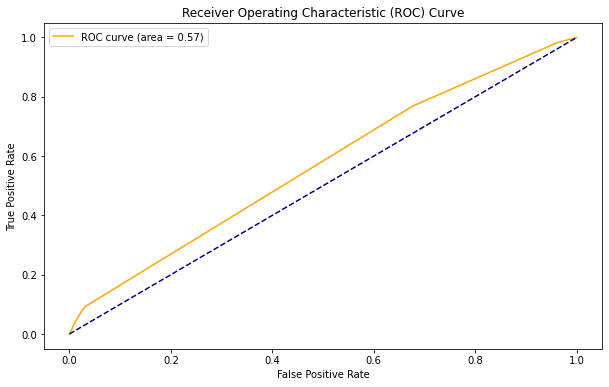

In [ ]:
plot_roc_curve(y, yhat)

# CONCLUSÃO


Utilizando o Classificador Scikit-learn foram encontrados os seguintes resultados abaixo:

Kernel na opção Polynomial, atingiu uma média ponderada de: 0.69  

Kernel na opção Sigmoid, atingiu uma média ponderada de: 0.64

Kernel na opção RBF, atingiu uma média ponderada de: 0.55



# O modelo de estatistica SFM.GLM , Modelos lineares Generalizados informam que:


  CidadeGrupoUm        0.456536
    
  CidadeGrupoDois      0.685273   

  Graduate             0.435440

  Masters              0.608980

  PhD                  1.000000

  Primary_School       1.000000

  Zero_Experiencia     0.813039

  Media_Experiencia    2.723291

 Maior_Experiencia    1.000000



# Resumindo:

A probabilidade de um candidato trabalhar para a empresa é dos que moram na Cidade do Grupo Dois, que tenha a instrução de PHD ou Escola Primaria e que tenham Experiencia na faixa de de 1 a 20 anos.  